##  Information about data

About Dataset
Context
The data is technical spec of cars. The dataset is downloaded from UCI Machine Learning Repository

Content
Title: Auto-Mpg Data

Sources:
(a) Origin: This dataset was taken from the StatLib library which is
maintained at Carnegie Mellon University. The dataset was
used in the 1983 American Statistical Association Exposition.
(c) Date: July 7, 1993

Past Usage:

See 2b (above)
Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
In Proceedings on the Tenth International Conference of Machine
Learning, 236-243, University of Massachusetts, Amherst. Morgan
Kaufmann.
Relevant Information:

This dataset is a slightly modified version of the dataset provided in
the StatLib library. In line with the use by Ross Quinlan (1993) in
predicting the attribute "mpg", 8 of the original instances were removed
because they had unknown values for the "mpg" attribute. The original
dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon,
to be predicted in terms of 3 multivalued discrete and 5 continuous
attributes." (Quinlan, 1993)

Number of Instances: 398

Number of Attributes: 9 including the class attribute

Attribute Information:

- mpg: continuous
- cylinders: multi-valued discrete
- displacement: continuous
- horsepower: continuous
- weight: continuous
- acceleration: continuous
- model year: multi-valued discrete
- origin: multi-valued discrete
- car name: string (unique for each instance)
- Missing Attribute Values: horsepower has 6 missing values

Acknowledgements
Dataset: UCI Machine Learning Repository
Data link : https://archive.ics.uci.edu/ml/datasets/auto+mpg


In [74]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline

<ipython-input-74-cfc68426f460>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


Read data from .csv file to data frame

In [73]:
df = pd.read_csv('auto-mpg.csv')

In [ ]:
dir_path = os.getcwd()
dir_path

'C:\\Users\\elena\\Documents\\Labs'

In [ ]:
#file_name = 'files/online_shoppers_intention.csv'
file_name='files/auto-mpg.csv'
df = pd.read_csv(file_name)

Get list of variables with information about data types

### Get information about data frame dimention

In [75]:
df.shape


(34, 9)

## Short view on data

In [78]:
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Car model
0,17.0,8,302.0,140,3449,10.5,70,1,ford
1,14.0,8,350.0,165,4209,12.0,71,1,chevrolet
2,26.0,4,91.0,70,1955,20.5,71,1,plymouth
3,25.0,4,97.5,80,2126,17.0,72,1,dodge
4,14.0,8,302.0,137,4042,14.5,73,1,ford


In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
model year        int64
origin            int64
Car model        object
dtype: object

## Check missings in data

In [79]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
Car model       0
dtype: int64

In [80]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
Car model       0
dtype: int64

In [81]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'Car model'],
      dtype='object')

# Data type definition

In [82]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
Car model        object
dtype: object

## Data type correction

In [87]:
mask = df.isin(['?']).any()
print(mask)

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model year      False
origin          False
Car model       False
dtype: bool


In [84]:
columns_with_question_mark = mask[mask].index
print(columns_with_question_mark)

Index(['horsepower'], dtype='object')


In [88]:
df_cleaned = df[~df.isin(['?']).any(axis=1)]

In [89]:
df_cleaned.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'Car model'],
      dtype='object')

In [91]:
df_cleaned['horsepower'] = df_cleaned['horsepower'].astype('float')
df_cleaned['origin'] = df_cleaned['origin'].astype('category')
df_cleaned['Car model'] = df_cleaned['Car model'].astype('category')


<ipython-input-91-41819ae8f625>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['horsepower'] = df_cleaned['horsepower'].astype('float')
<ipython-input-91-41819ae8f625>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['origin'] = df_cleaned['origin'].astype('category')
<ipython-input-91-41819ae8f625>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [92]:
df_cleaned.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
model year         int64
origin          category
Car model       category
dtype: object

## Data visualisation - matplotlib
Matplotlib (first released in 2003) is the most popular library for data visualisation in Python.

It's extremely flexible, so you have almost full control on your plots.
Command for installation:
!pip install matplotlib

In [93]:
df_cleaned.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
model year         int64
origin          category
Car model       category
dtype: object

### Histograms

<Axes: ylabel='Frequency'>

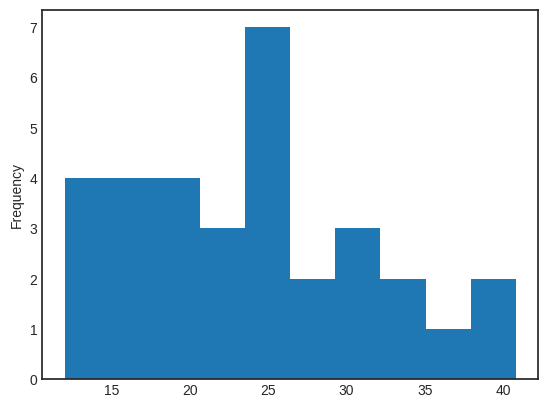

In [94]:
# from Pandas
df_cleaned['mpg'].plot.hist()

array([[<Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'displacement'}>, <Axes: >]], dtype=object)

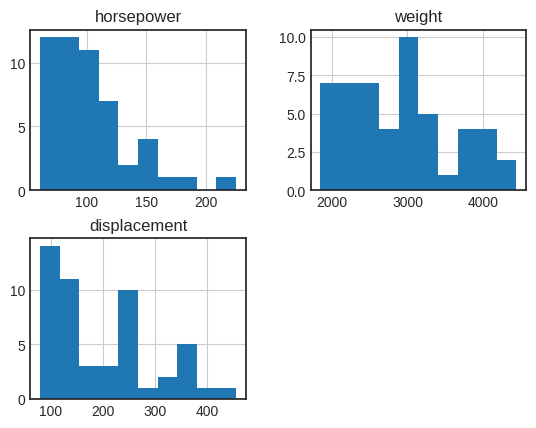

In [ ]:
df_cleaned[['horsepower', 'weight', 'displacement']].hist()

<Axes: ylabel='Frequency'>

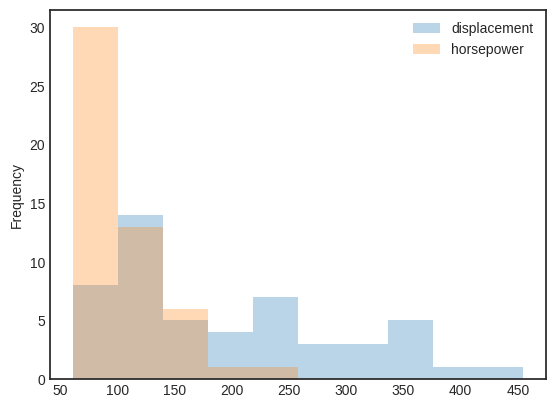

In [ ]:
df_cleaned[['displacement','horsepower']].plot.hist(histtype = "stepfilled", bins=10, alpha=0.3)

(array([1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 2.,
        1., 0., 1., 2., 0., 1., 2., 1., 1., 4., 1., 3., 1., 2., 0., 1., 0.,
        1., 0., 1., 0., 0., 1.]),
 array([10.5 , 10.75, 11.  , 11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 ,
        12.75, 13.  , 13.25, 13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75,
        15.  , 15.25, 15.5 , 15.75, 16.  , 16.25, 16.5 , 16.75, 17.  ,
        17.25, 17.5 , 17.75, 18.  , 18.25, 18.5 , 18.75, 19.  , 19.25,
        19.5 , 19.75, 20.  , 20.25, 20.5 ]),
 [<matplotlib.patches.Polygon at 0x7850671af520>])

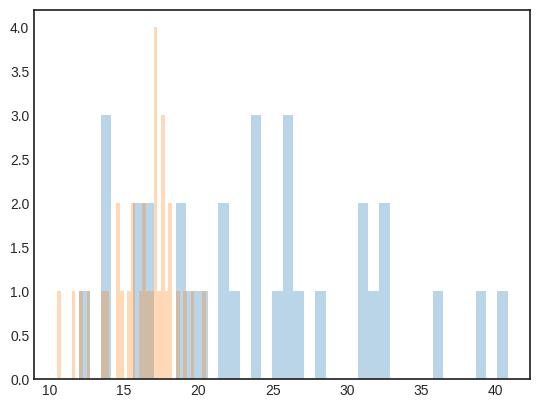

In [95]:
kwargs = dict(histtype = "stepfilled", alpha = 0.3, bins=40)
x1 = df_cleaned['mpg']
x2 = df_cleaned['acceleration']
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)

<Axes: ylabel='Density'>

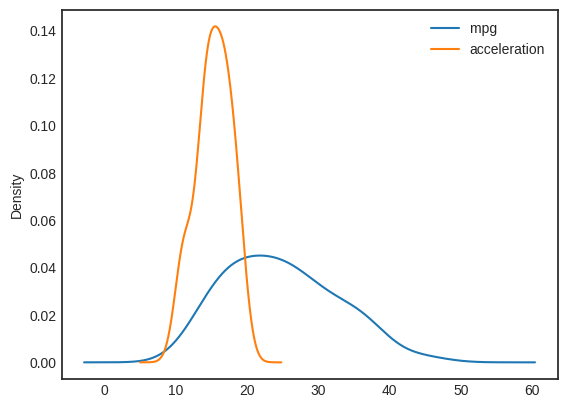

In [ ]:
df_cleaned[['mpg','acceleration']].plot.density()

In [ ]:
df_cleaned['car_name'].value_counts()

toyota corolla                       2
amc ambassador brougham              1
plymouth duster                      1
ford granada l                       1
ford maverick                        1
ford mustang ii 2+2                  1
ford ranger                          1
honda civic 1500 gl                  1
mazda glc custom l                   1
mercury zephyr 6                     1
nissan stanza xe                     1
oldsmobile cutlass ciera (diesel)    1
oldsmobile cutlass supreme           1
plymouth horizon miser               1
amc concord                          1
plymouth horizon tc3                 1
plymouth reliant                     1
plymouth satellite                   1
pontiac firebird                     1
pontiac grand prix lj                1
saab 99le                            1
subaru dl                            1
toyota cressida                      1
volvo 144ea                          1
ford galaxie 500                     1
ford futura              

## Box-Plots for separate countries

<Axes: >

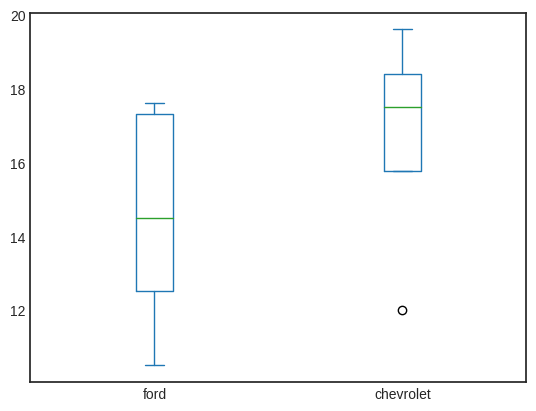

In [96]:
pd.DataFrame([df_cleaned[df_cleaned["Car model"]=="ford "]["acceleration"],
              df_cleaned[df_cleaned["Car model"]=="chevrolet "]["acceleration"]],
             index=("ford", "chevrolet")).T.plot.box(whis=1)


<Axes: >

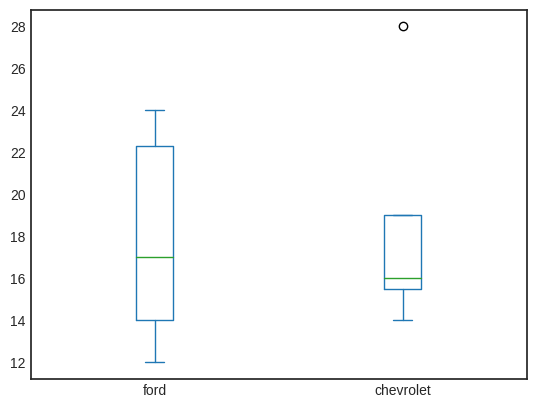

In [97]:
pd.DataFrame([df_cleaned[df_cleaned["Car model"]=="ford "]["mpg"],
              df_cleaned[df_cleaned["Car model"]=="chevrolet "]["mpg"]],
             index=("ford", "chevrolet")).T.plot.box(whis=1)

<Axes: >

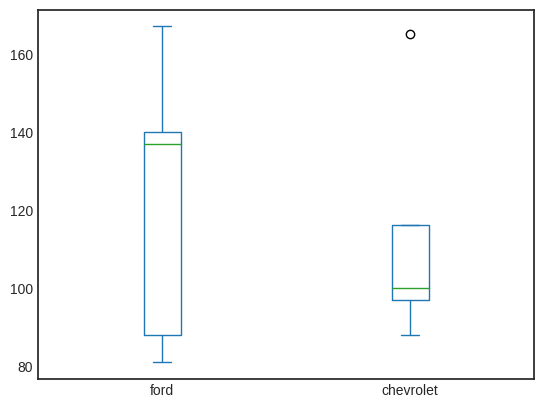

In [98]:
pd.DataFrame([df_cleaned[df_cleaned["Car model"]=="ford "]["horsepower"],
              df_cleaned[df_cleaned["Car model"]=="chevrolet "]["horsepower"]],
             index=("ford", "chevrolet")).T.plot.box(whis=1)

<Axes: >

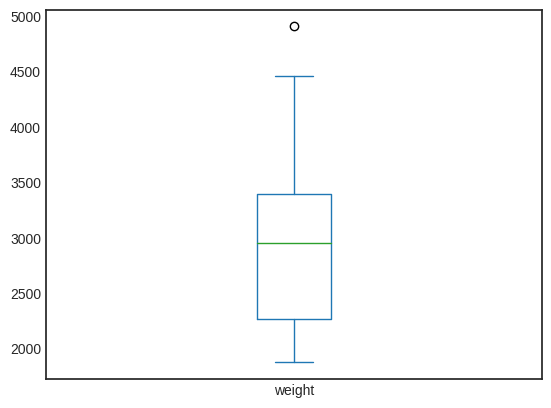

In [117]:
df_cleaned["weight"].plot.box(whis=1)

<Axes: >

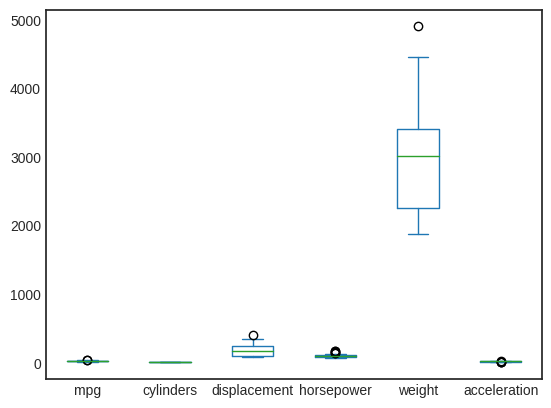

In [122]:
df_cleaned[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration"]].plot.box(whis=1)

<Axes: >

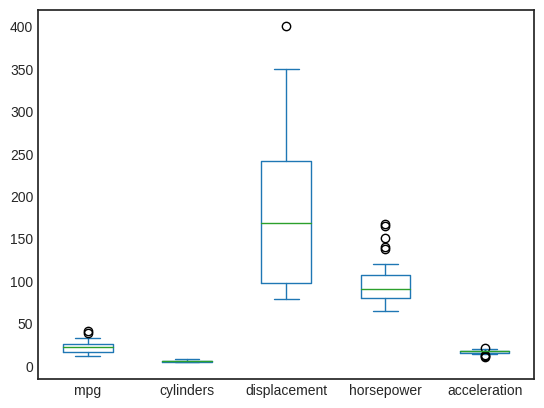

In [121]:
df_cleaned[["mpg", "cylinders", "displacement", "horsepower", "acceleration"]].plot.box(whis=1)

array([[<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'displacement'}>],
       [<Axes: title={'center': 'horsepower'}>,
        <Axes: title={'center': 'weight'}>,
        <Axes: title={'center': 'acceleration'}>],
       [<Axes: title={'center': 'model year'}>, <Axes: >, <Axes: >]],
      dtype=object)

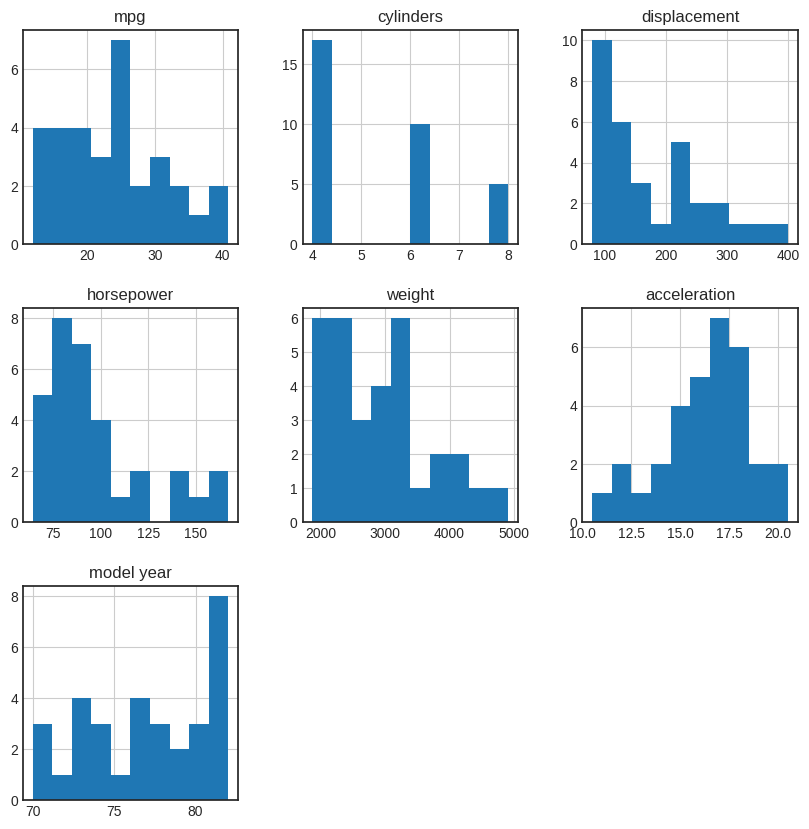

In [101]:
df_cleaned[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"
           ]].hist(figsize=(10,10))

## Descriptive statistics

In [ ]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
model year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0


In [102]:
df_cleaned.median()

<ipython-input-102-46af42568170>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned.median()


mpg               23.95
cylinders          4.00
displacement     143.00
horsepower        90.00
weight          2842.50
acceleration      16.75
model year        77.00
dtype: float64

In [103]:
df_cleaned[["Car model", "origin"]].describe()

,Car model,origin
count,32,32
unique,14,3
top,dodge,1
freq,5,21


In [104]:
df_cleaned.quantile(0.05)

<ipython-input-104-95bfa85adbf8>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned.quantile(0.05)


mpg               14.00
cylinders          4.00
displacement      85.55
horsepower        66.10
weight          1979.75
acceleration      11.82
model year        71.00
Name: 0.05, dtype: float64

In [105]:
df_cleaned.quantile(0.95)

<ipython-input-105-03bfbc93b2a6>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned.quantile(0.95)


mpg               37.35
cylinders          8.00
displacement     332.40
horsepower       156.75
weight          4320.60
acceleration      19.38
model year        82.00
Name: 0.95, dtype: float64

In [119]:
#Delete outliers

# Calculate the number of rows to remove (last 5%)
num_rows_to_remove = int(len(df_cleaned) * 0.05)
print(num_rows_to_remove)

# Remove the last 5% of observations
df_cleaned = df_cleaned.iloc[:-num_rows_to_remove]

1


In [120]:
df_cleaned.shape

(27, 9)

## Correlation matrix

In [131]:
df_cleaned_num = df_cleaned.select_dtypes(include = ['float64', 'int64','float32', 'int32'])
df_cleaned_cat = df_cleaned.select_dtypes(include= ['object', 'category'])

In [132]:
df_cleaned_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 27
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           27 non-null     float64
 1   cylinders     27 non-null     int64  
 2   displacement  27 non-null     float64
 3   horsepower    27 non-null     float64
 4   weight        27 non-null     int64  
 5   acceleration  27 non-null     float64
 6   model year    27 non-null     int64  
dtypes: float64(4), int64(3)
memory usage: 1.7 KB


In [133]:
df_cleaned_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 27
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   origin     27 non-null     category
 1   Car model  27 non-null     category
dtypes: category(2)
memory usage: 1.0 KB


In [135]:
df_cleaned_num.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.792505,-0.831009,-0.805659,-0.868734,0.482479,0.552526
cylinders,-0.792505,1.000000,0.958670,0.843096,0.909625,-0.626860,-0.507758
displacement,-0.831009,0.958670,1.000000,0.851386,0.941617,-0.611048,-0.440869
horsepower,-0.805659,0.843096,0.851386,1.000000,0.881625,-0.807412,-0.531478
weight,-0.868734,0.909625,0.941617,0.881625,1.000000,-0.560939,-0.364920
acceleration,0.482479,-0.626860,-0.611048,-0.807412,-0.560939,1.000000,0.460203
model year,0.552526,-0.507758,-0.440869,-0.531478,-0.364920,0.460203,1.000000


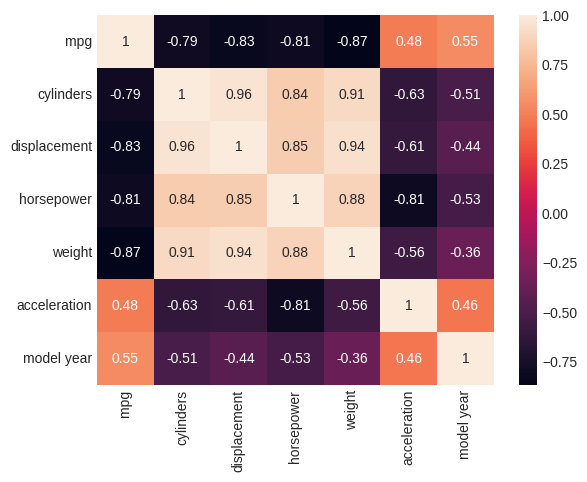

In [136]:
sns.heatmap(df_cleaned_num[['mpg','cylinders','displacement','horsepower','weight', 'acceleration', 'model year']].corr(),
            annot=True);

In [139]:
from scipy import stats

In [140]:
pearson_coef, p_value = stats.pearsonr(df_cleaned_num["mpg"], df_cleaned_num["acceleration"])
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results

Pearson Correlation Coefficient:  0.4824785269170776 and a P-value of: 0.010808713931991907


In [142]:
from scipy.stats.stats import pearsonr

<ipython-input-142-0ebd78c1f4f1>:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [143]:
res=pearsonr(df_cleaned_num["mpg"], df_cleaned_num["weight"])
print(f"correlation value is {round(res[0],4)} and p-value is {res[1]:.3E}")

correlation value is -0.8687 and p-value is 4.226E-09


In [144]:
pd.crosstab(df_cleaned["Car model"], columns=df_cleaned["origin"]).apply(lambda row: row/row.sum(), axis=1)

origin,1,2,3
Car model,,,
amc,1.0,0.0,0.0
buick,1.0,0.0,0.0
chevrolet,1.0,0.0,0.0
datsun,0.0,0.0,1.0
dodge,1.0,0.0,0.0
fiat,0.0,1.0,0.0
ford,1.0,0.0,0.0
mazda,0.0,0.0,1.0
mercedes-benz,0.0,1.0,0.0


In [145]:
pd.crosstab(df_cleaned["model year"], columns=df_cleaned["cylinders"])

cylinders,4,6,8
model year,,,
70,0,0,1
71,1,0,1
72,1,0,0
73,1,1,2
74,1,1,1
75,0,1,0
76,1,3,0
78,2,1,0
79,1,1,0


### Scatter plot from Pandas


<Axes: xlabel='horsepower', ylabel='mpg'>

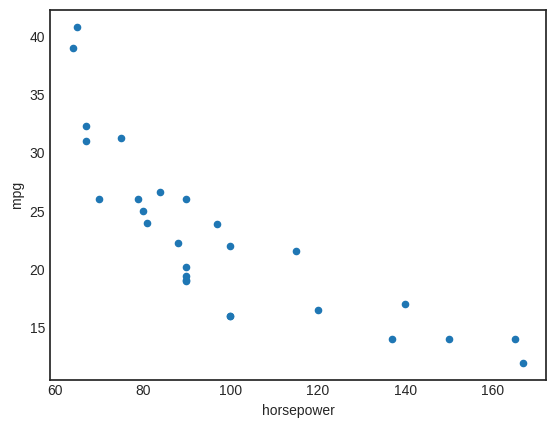

In [146]:
df_cleaned.plot.scatter(x="horsepower", y="mpg")

<Axes: xlabel='displacement', ylabel='mpg'>

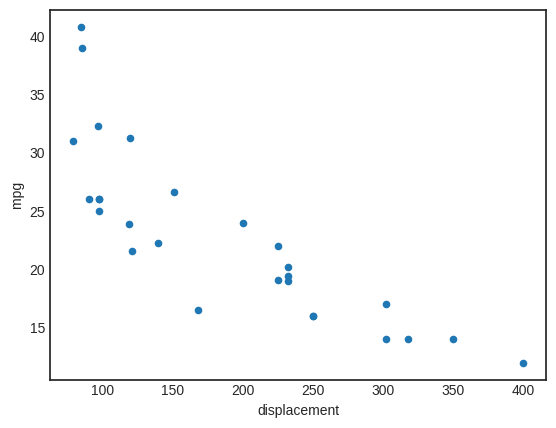

In [147]:
df_cleaned.plot.scatter(x="displacement", y="mpg")

### Bar plots from Pandas

<Axes: xlabel='Car model'>

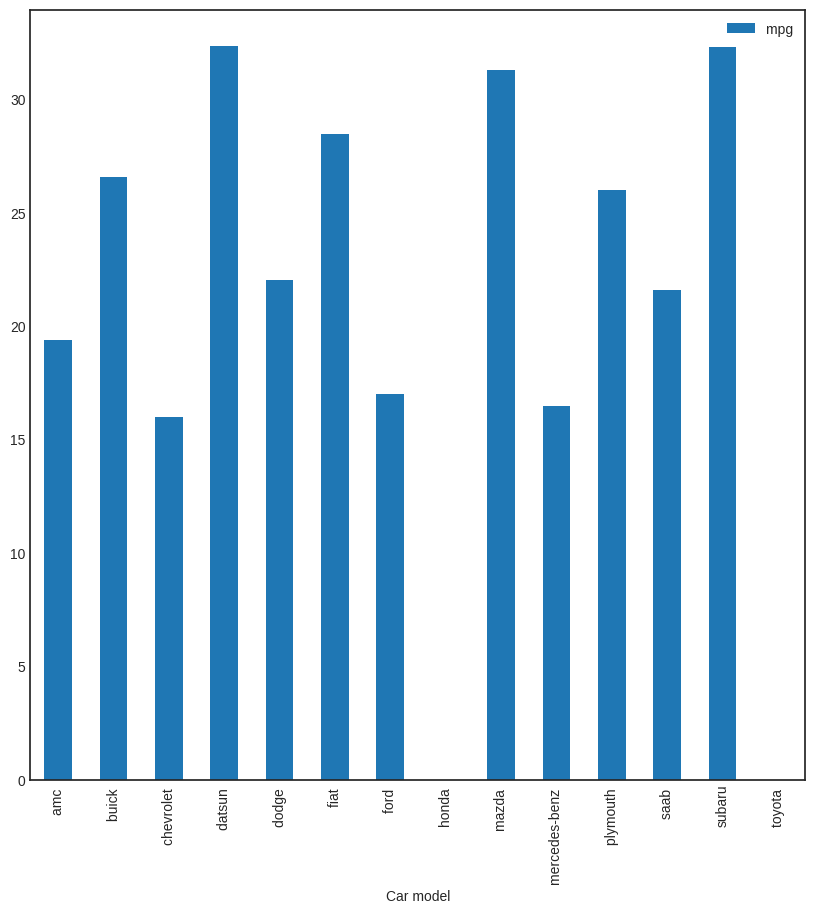

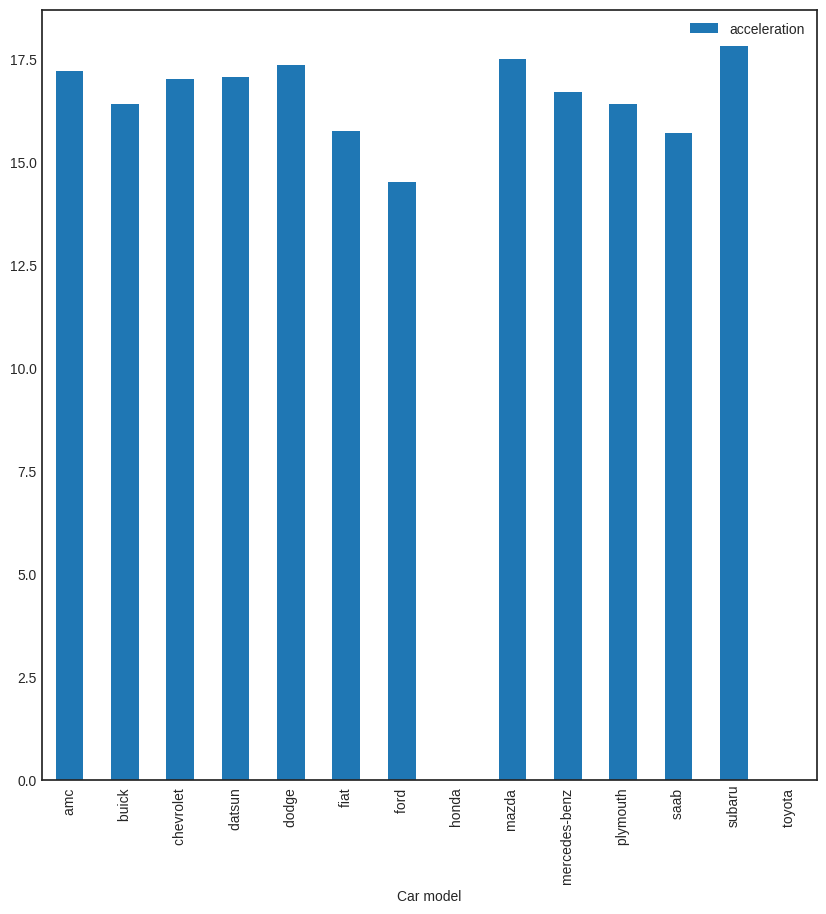

In [148]:
df_cleaned.groupby("Car model").agg({'mpg':'median'}).plot.bar(figsize=(10,10))
df_cleaned.groupby("Car model").agg({'acceleration':'median'}).plot.bar(figsize=(10,10))

### Pie charts from Pandas

<Axes: ylabel='mpg'>

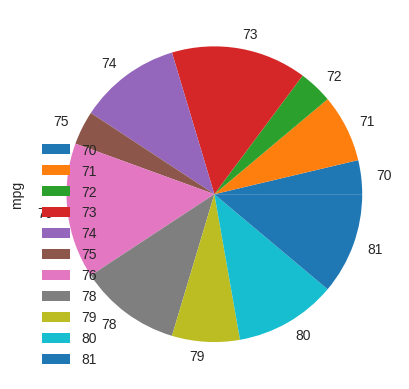

In [149]:
df_cleaned.groupby("model year").count().plot.pie(y="mpg")

<Axes: >

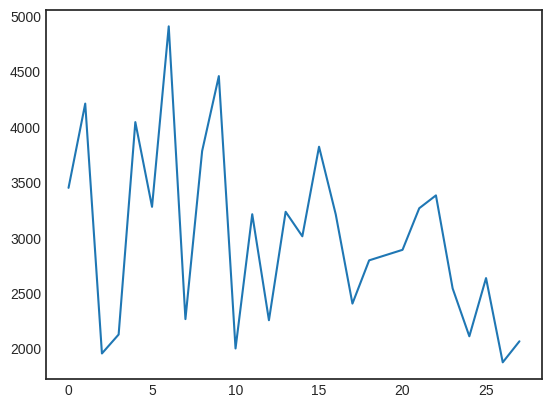

In [150]:
df_cleaned["weight"].plot.line()

## Matplotlib graphs


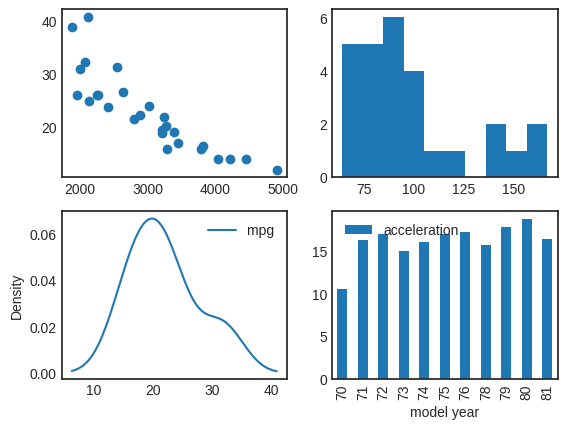

In [151]:
figure, axis = plt.subplots(2, 2)
axis = axis.flatten()
axis[0].scatter(x=df_cleaned['weight'], y=df_cleaned['mpg'])
axis[1].hist(df_cleaned['horsepower'])
df_cleaned.groupby("model year").agg({'mpg':'median'}).plot.density(ax=axis[2])
df_cleaned.groupby("model year").agg({'acceleration':'median'}).plot.bar(ax=axis[3])
plt.show()

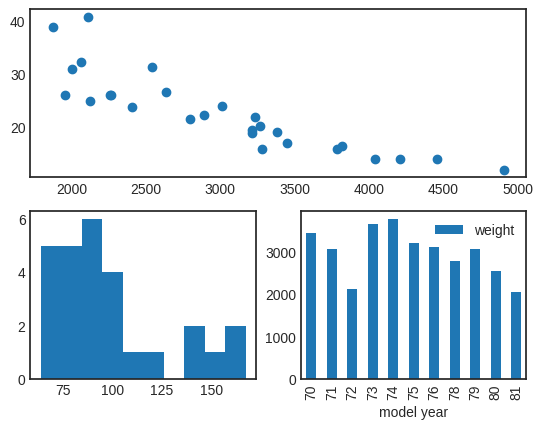

In [152]:
from matplotlib.gridspec import GridSpec
fig = plt.figure()
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax1.scatter(x=df_cleaned['weight'], y=df_cleaned['mpg'])
ax2.hist(df_cleaned['horsepower'])
df_cleaned.groupby("model year").agg({'weight':'median'}).plot.bar(ax=ax3)
plt.show()

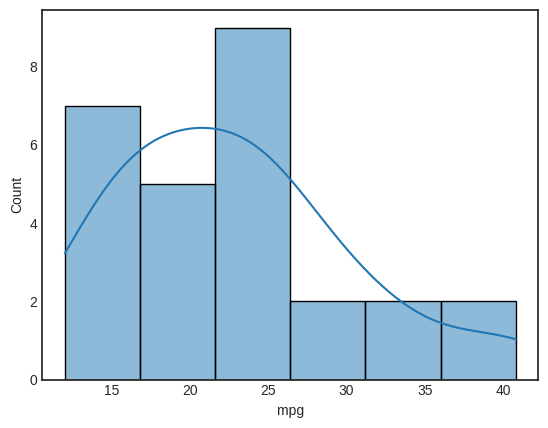

In [153]:
sns.histplot(data=df_cleaned, x='mpg', kde=True);

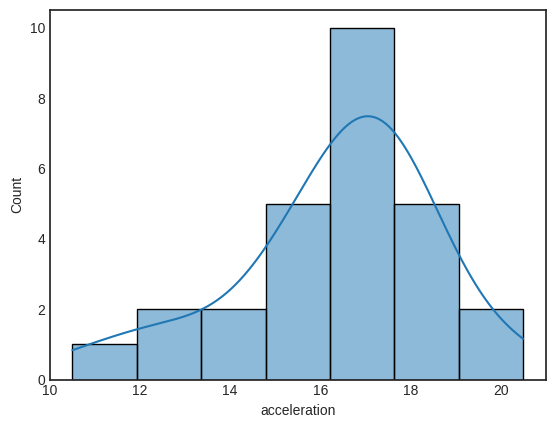

In [154]:
sns.histplot(data=df_cleaned, x='acceleration', kde=True);

## Standartization

In [155]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler


In [ ]:
https://towardsdatascience.com/data-transformation-and-feature-engineering-e3c7dfbb4899

In [158]:
scaler = MinMaxScaler()

In [164]:
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned_num), columns=df_cleaned_num.columns)

In [165]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           27 non-null     float64
 1   cylinders     27 non-null     float64
 2   displacement  27 non-null     float64
 3   horsepower    27 non-null     float64
 4   weight        27 non-null     float64
 5   acceleration  27 non-null     float64
 6   model year    27 non-null     float64
dtypes: float64(7)
memory usage: 1.6 KB


<Axes: >

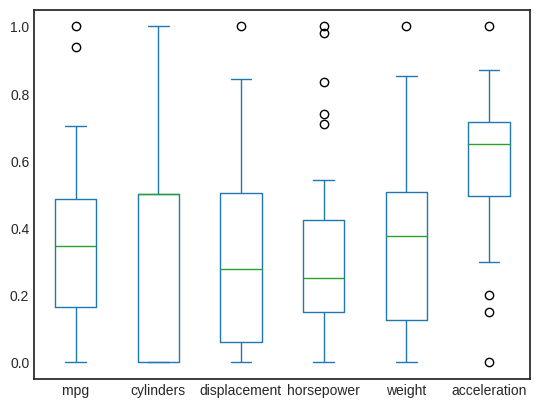

In [166]:
df_scaled[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration"]].plot.box(whis=1)